In [2]:
import tensorflow.keras as keras
import numpy as np
import os
import PIL
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
indata = keras.datasets.mnist.load_data()

In [3]:
len(indata[1][1])

10000

In [4]:
training_data = indata[0]
test_data = indata[1]


In [460]:
input_layer = keras.layers.Input(shape=(28, 28, 1))
model = keras.layers.Conv2D(32, (3,3))(input_layer)
model = keras.layers.MaxPooling2D()(model)
model = keras.layers.Conv2D(64, (3,3))(model)
model = keras.layers.MaxPooling2D()(model)
model = keras.layers.Flatten()(model)
model = keras.layers.Dense(128)(model)
model = keras.layers.Dropout(0.5)(model)
model = keras.layers.Dense(10, activation='softmax')(model)

model = keras.models.Model(inputs=[input_layer], outputs=[model])

In [461]:
adam = keras.optimizers.Adam()

In [462]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'],
             )

In [463]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               204

In [549]:
#add some noise to the training images
noisy_training_data = training_data[0].copy()/255.
for idx, x, in enumerate(noisy_training_data):
    noise = np.random.rand(28*28).reshape(28, 28) / 2.
    noisy_training_data[idx] += noise
    

In [550]:
model.fit(noisy_training_data[:].reshape(-1, 28, 28, 1), training_data[1][:],
         epochs=1)

60000/60000 [==============================] - 4s 67us/sample - loss: 0.0593 - acc: 0.9819


In [394]:
model.optimizer.lr = 0.0002

In [244]:
training_data[1][:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [467]:
Y_pred = model.predict(test_data[0][:].reshape(-1, 28, 28, 1)/255.)
y_pred = np.argmax(Y_pred, axis=1)

In [468]:
print(classification_report(test_data[1][:], y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.97      0.98      0.97       892
           6       1.00      0.97      0.98       958
           7       0.95      0.99      0.97      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [1]:
indir = 'https://drive.google.com/drive/folders/1HxN80kC48O58zUz5SPlOfS-TwESmKW_f?usp=sharing'
student_photos = []
student_photos_arrays = []

for infile in os.listdir(indir):
    if infile[-3:] == 'png':
        student_photos.append(PIL.Image.open(indir+infile))
        student_photos_arrays.append(np.array(PIL.Image.open(indir+infile)))
        

NameError: name 'os' is not defined

In [183]:
len(student_photos)

17

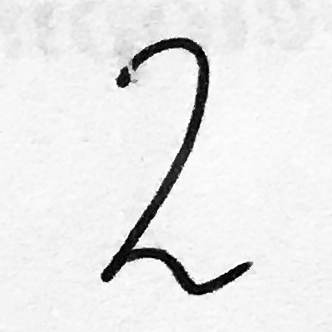

In [184]:
student_photos[1]

In [185]:
np.array(student_photos[0])

array([[242, 241, 242, ..., 246, 247, 247],
       [243, 242, 242, ..., 247, 247, 247],
       [243, 243, 243, ..., 248, 247, 246],
       ...,
       [246, 246, 246, ..., 248, 248, 248],
       [246, 246, 246, ..., 249, 248, 248],
       [247, 246, 246, ..., 249, 249, 249]], dtype=uint8)

In [186]:
student_photos_arrays[0].shape

(284, 264)

In [506]:
image_size = 28
indir = '/content/drive/MyDrive/numbers/'

def edit_photo(inphoto):
    out = inphoto - 255
    out *= -1
    out /= 255.
    #out[out < 0.1] = 0.0
    return out
    
input_photos = keras.preprocessing.image.ImageDataGenerator(preprocessing_function = edit_photo)
photos = input_photos.flow_from_directory(indir, 
                                          shuffle=False,
                                          color_mode='grayscale', #all ifcb images are grayscale
                                          class_mode='sparse', #there are multiple classes of images (i.e. > 2)
                                          target_size=(image_size,image_size),  #squish/stretch images to this size
                                          batch_size=1)

Found 33 images belonging to 10 classes.


In [555]:
photos.reset()
predictions = model.predict_generator(photos)

In [372]:
for idx, indiv_number in enumerate(predictions):
    print(np.argmax(indiv_number), photos.classes[idx], indiv_number)

1 1 [5.9745230e-07 9.4164270e-01 3.8068863e-06 5.6685567e-02 1.3895580e-06
 1.4697690e-03 2.3241244e-06 9.4833347e-08 1.0649662e-04 8.7409549e-05]
1 1 [2.7365892e-09 9.9999726e-01 9.7675938e-09 1.4962195e-06 3.8334494e-10
 1.1717359e-06 2.3049489e-09 1.4031780e-09 2.0145050e-08 1.3337859e-09]
1 2 [8.4876828e-04 9.5901185e-01 3.1312086e-02 5.9349728e-03 1.1692718e-05
 2.7408625e-03 8.2258657e-06 6.0770394e-06 4.8590293e-05 7.6883174e-05]
2 2 [1.6886488e-05 3.5374422e-02 9.6371287e-01 8.5754169e-04 4.9714384e-07
 7.3351623e-07 6.9710086e-07 1.5349273e-05 1.9790261e-05 1.2755874e-06]
4 4 [1.6002085e-08 5.9456801e-07 6.1773244e-09 5.1165322e-10 9.9980301e-01
 1.0721230e-07 3.3145298e-08 1.2504976e-04 2.6268808e-07 7.1018389e-05]
4 4 [2.1217973e-08 1.4031120e-05 1.5920735e-09 2.5934286e-09 9.9921799e-01
 2.4304773e-08 3.1874223e-10 6.1901950e-04 1.8278305e-08 1.4886528e-04]
5 5 [4.9339536e-07 5.0426777e-08 4.9291676e-10 8.2546775e-04 1.7158940e-12
 9.9917299e-01 9.0088088e-07 1.2745438e-08 

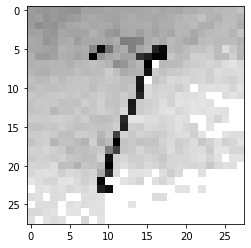

In [424]:
plt.imshow(photos.next()[0][0].reshape(28,28), cmap='gray_r')

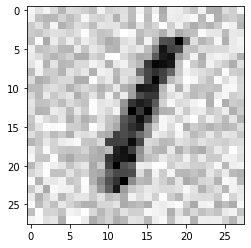

In [552]:
plt.imshow(noisy_training_data[105], cmap='gray_r')

In [138]:
temp[1]

array([0.], dtype=float32)

In [288]:
student_photos[0].resize((28,28))

In [290]:
temp_input = np.array(student_photos[0].resize((28,28))).reshape(-1, 28, 28, 1)
temp_input[temp_input < 0.1] = 0
model.predict(temp_input)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

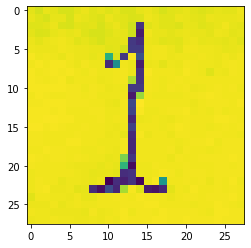

In [292]:
plt.imshow(temp_input.reshape(28, 28))

<Figure size 432x288 with 0 Axes>

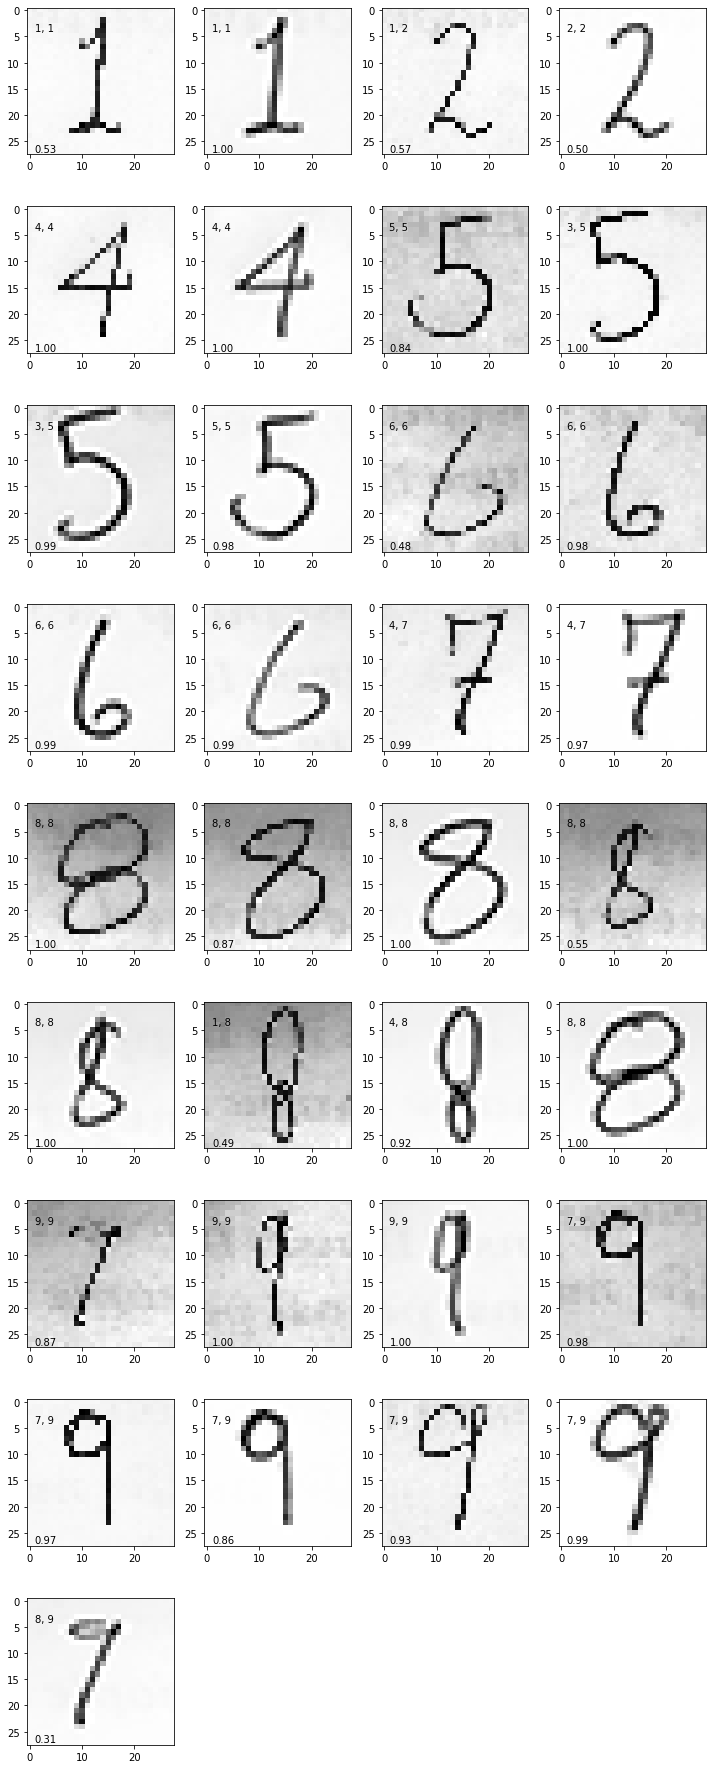

In [556]:
fig = plt.figure()
fig = plt.subplots(22, 4, figsize=(10,35))
photos.reset()

for idx, indiv_number in enumerate(predictions):
    plt.subplot(22,4,idx+1)
    temp = photos.next()
    plt.imshow(temp[0].reshape(28,28), cmap = 'gray_r')
    plt.annotate('{}, {}'.format(np.argmax(indiv_number), photos.classes[idx]), (1,4))
    plt.annotate('{:2.2f}'.format(indiv_number[np.argmax(indiv_number)]), (1,27))
    
plt.tight_layout()

In [136]:
temp = photos.next()

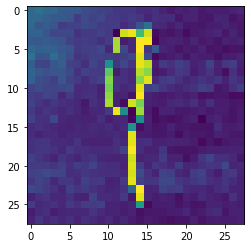

In [535]:
temp_nine = photos.next()[0][0]
plt.imshow(temp_nine.reshape(28,28))

In [554]:
#went through and made sure that 9 was next

model.fit(temp_nine.reshape(-1, 28, 28, 1), np.array([1]), epochs = 1)

Epoch 1/5
1/1 [==============================] - 0s 5ms/sample - loss: 2.7330 - acc: 0.0000e+00
Epoch 2/5
1/1 [==============================] - 0s 2ms/sample - loss: 0.0541 - acc: 1.0000
Epoch 3/5
1/1 [==============================] - 0s 3ms/sample - loss: 4.4491e-04 - acc: 1.0000
Epoch 4/5
1/1 [==============================] - 0s 2ms/sample - loss: 1.0729e-05 - acc: 1.0000
Epoch 5/5
1/1 [==============================] - 0s 2ms/sample - loss: 2.6226e-06 - acc: 1.0000
